## Стохастический градиентный спуск (Stochastic Gradient Descent - SGD) или метод Роббинса-Монро

Ссылки на видео:
1. [Стохастический градиентный спуск SGD и алгоритм SAG](https://www.youtube.com/watch?v=wPk8Z3aOBsg&list=PLA0M1Bcd0w8zxDIDOTQHsX68MCDOAJDtj&index=9)
2. [Пример использования SGD при бинарной классификации образов](https://www.youtube.com/watch?v=gPC2B--Sza4&list=PLA0M1Bcd0w8zxDIDOTQHsX68MCDOAJDtj&index=10)

Ссылки на конспекты к видео:
1. [Стохастический градиентный спуск SGD и алгоритм SAG](https://proproprogs.ru/ml/ml-stohasticheskiy-gradientnyy-spusk-sgd-i-algoritm-sag)
2. [Пример использования SGD при бинарной классификации образов](https://proproprogs.ru/ml/ml-primer-ispolzovaniya-sgd-pri-binarnoy-klassifikacii-obrazov)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# сигмоидная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

In [3]:
# производная сигмоидной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y

In [4]:
# обучающая выборка с тремя признаками (третий - константа +1)
x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [12]:
x_train

array([[10, 50,  1],
       [20, 30,  1],
       [25, 30,  1],
       [20, 60,  1],
       [15, 70,  1],
       [40, 40,  1],
       [30, 45,  1],
       [20, 45,  1],
       [40, 30,  1],
       [ 7, 35,  1]])

In [5]:
n_train = len(x_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = 0.0005  # шаг сходимости SGD
lm = 0.01  # скорость "забывания" для Q
N = 500  # число итераций SGD

In [6]:
Q = np.mean([loss(w, x, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

In [16]:
for i in range(N):
    k = np.random.randint(0, n_train - 1)  # случайный индекс
    ek = loss(w, x_train[k], y_train[k])  # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])  # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q  # пересчет показателя качества
    Q_plot.append(Q)

print(w)
# print(Q_plot[:10])

[ 0.57513996 -0.31020662  0.01189253]


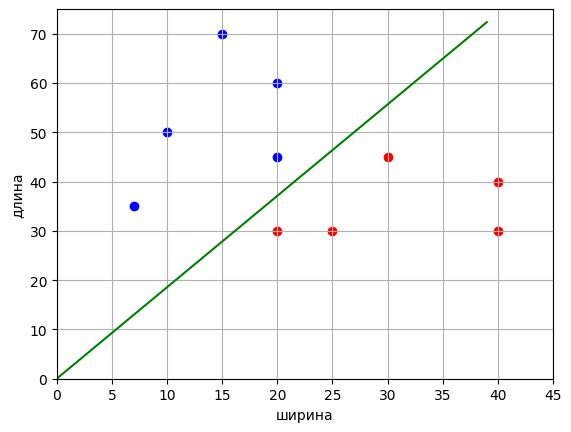

In [17]:
line_x = list(range(max(x_train[:, 0])))  # формирование графика разделяющей линии
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

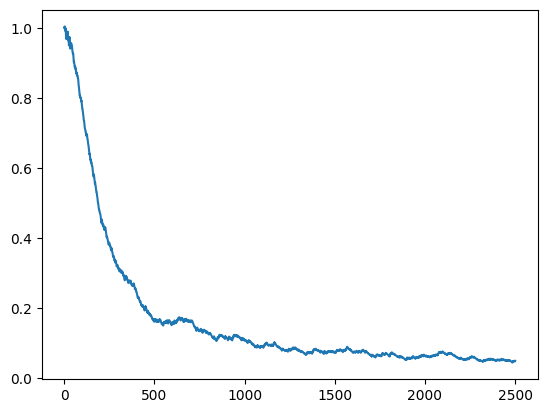

In [28]:
plt.plot(Q_plot)
plt.show()